In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from metrics import accuracy, precision
from methods import gradient_descent, predict, lipschitz_generator, sgd, sgd_momentum, nestrov_accelerated_gradient, AdaGrad, RMSProp, ADAM, AdaDelta

In [2]:
SEED = 42

In [3]:
# Generating Data
np.random.seed(SEED)

n = 100

X_0 = np.random.normal(0, 1, (2,int(n/2)))
X_1 = np.random.normal(5, 1, (2,int(n/2)))
ones = np.ones(n)

y_0 = np.zeros(int(n/2))
y_1 = np.ones(int(n/2))

X = np.append(X_0, X_1, axis = 1)
X = np.append([ones], X, axis =0)
X = X.T

y = np.append(y_0, y_1)
y = np.reshape(y, newshape = (n,1))

/var/folders/c6/bflj7jtn117gmc20cqnz2sg40000gn/T/ipykernel_9201/3805877808.py:18: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  y = np.reshape(y, newshape = (n,1))


Text(0, 0.5, 'x_{1}')

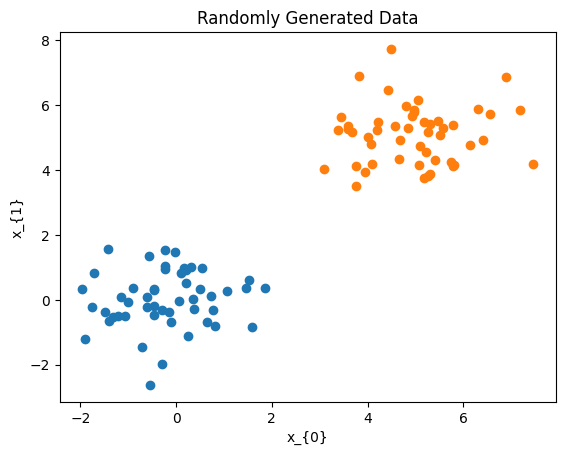

In [4]:
plt.scatter(X_0[0], X_0[1], label = '0')
plt.scatter(X_1[0], X_1[1], label = '1')
plt.title('Randomly Generated Data')
plt.xlabel(r'x_{0}')
plt.ylabel(r'x_{1}')

In [5]:
# Shuffling X
np.random.seed(SEED)

seed = np.random.randint(0, 10000)
np.random.seed(seed = seed)
np.random.shuffle(X)
np.random.seed(seed = seed)
np.random.shuffle(y)

In [6]:
X_train, X_test = X[0:80, :], X[80:100, :]
y_train, y_test = y[0:80, :], y[80:100, :]

# Gradient Descent on Cross Entropy Loss

In [7]:
w, loss_list = gradient_descent(X_train, y_train, num_iter = 10000, step_size = 0.125)

In [8]:
train_y_pred = predict(X_train, w)
train_acc = accuracy(y_train, train_y_pred).item()

print(f'Train Accuracy: {train_acc*100}%')

test_y_pred = predict(X_test, w)
test_acc = accuracy(y_test, test_y_pred).item()

print(f'Test Accuracy: {test_acc*100}%')


Train Accuracy: 100.0%
Test Accuracy: 100.0%


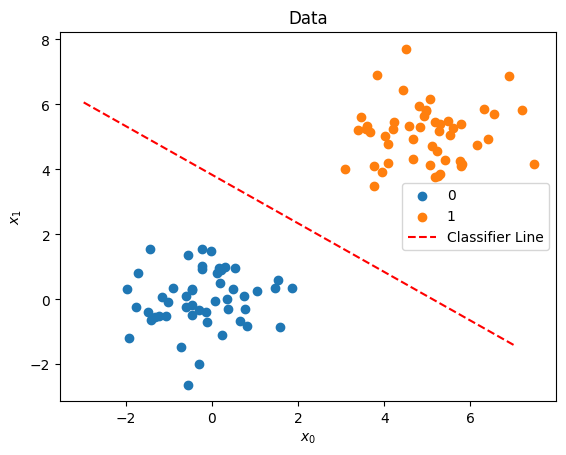

In [9]:
sample1_0 = 7
sample1_1 = -1 * (w[0] + w[1]*sample1_0) / w[2]

sample2_0 = -3
sample2_1 = -1 * (w[0] + w[1]*sample2_0) / w[2]


plt.scatter(X_0[0], X_0[1], label = '0')
plt.scatter(X_1[0], X_1[1], label = '1')
plt.plot([sample1_0, sample2_0], [sample1_1, sample2_1], label = 'Classifier Line', color = 'red', linestyle = 'dashed')
plt.title('Data')
plt.xlabel(r'$x_{0}$')
plt.ylabel(r'$x_{1}$')
plt.legend(loc = 'best')

## Lipschitz Constant Generator

In [10]:
l = lipschitz_generator(X, y, m=1000, seed=SEED).item()

# SGD

In [11]:
sgd_w, sgd_loss_list = sgd(X_train, y_train, num_iter = 1000, step_size = 0.125)

# SGD & Momentum

In [12]:
sgd_mom_w_array, sgd_mom_loss_list = sgd_momentum(X_train, y_train, num_iter = 2000, step_size = 0.125, batch_size = 1, momentum_term = 0.9, seed=SEED)

# Nestrov Accelerated Gradient

In [13]:
nag_w_array, nag_loss_list = nestrov_accelerated_gradient(X_train, y_train, num_iter = 2000, step_size = 0.125, batch_size = 1, momentum_term = 0.9, seed=SEED)

# AdaGrad

In [14]:
ada_grad_w_array, ada_grad_loss_list = AdaGrad(X_train, y_train, num_iter = 1000, step_size = 1, batch_size = 1, seed=SEED)

# AdaDelta

In [15]:
ada_delta_w_array, ada_delta_loss_list = AdaDelta(X_train, y_train, num_iter = 1000, step_size = 0.125, batch_size = 1, seed=SEED)

# RMSprop

In [16]:
rmsprop_w_array, rmsprop_loss_list = RMSProp(X_train, y_train, num_iter = 1000, step_size = 0.125, batch_size = 1, seed=SEED)

# ADAM

In [17]:
adam_w_array, adam_loss_list = ADAM(X_train, y_train, num_iter = 1000, step_size = 0.125, batch_size = 1, seed=SEED)

In [18]:
loss_results = [loss_list, sgd_loss_list, sgd_mom_loss_list, nag_loss_list, ada_delta_loss_list, ada_grad_loss_list, rmsprop_loss_list, adam_loss_list]
loss_labels = ["Gradient Descent", 'SGD', 'SGD with Momentum', 'NAG', 'ADA-Delta', 'ADA-Grad', 'RMSProp', 'Adam']


fig = go.Figure()
for index, loss_list in enumerate(loss_results):

	n = len(loss_list)
	x = np.linspace(start=1, stop=n, num=n).tolist()
	loss_list = [float(loss) for loss in loss_list]

	fig.add_trace(go.Scatter(
		x=x,
		y=loss_list,
		mode='lines',
		name=loss_labels[index]
	))


fig.update_layout(
    title="Comparison of different Optimization Methods",
    xaxis_title="Iteration",
    yaxis_title="Loss",
    legend_title="Optimization Methods",
    showlegend=True,
    xaxis=dict(range=[0, 200]),
    yaxis=dict(range=[0, 50])
)

fig.write_image("optimization_methods.png")

fig.show()
